# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


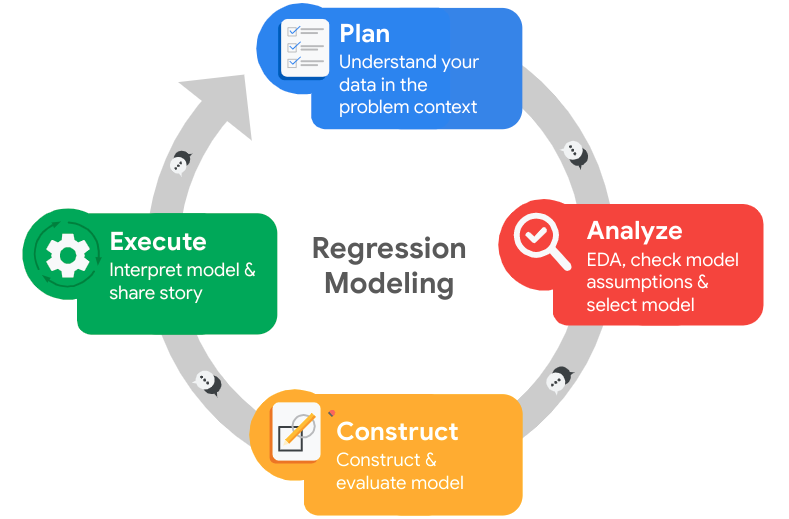

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
%%time

#uncomment the following lines for the first time the notebook is run within a session

'''
!conda config --set channel_priority false
!'/opt/conda/bin/python3' -m pip install --upgrade pip
!pip3 install spacy==3.7.5. --no-cache-dir
!pip3 install category_encoders
!pip3 install imbalanced-learn==0.7.0
!pip3 install PyALE


!pip3 install alibi==0.5.0
!pip3 install numpy==1.18.4
!pip3 install tensorflow==1.15.5

!pip3 install shap==0.23.0

!conda install -y category_encoders #- only run this line when first loading the code -code to install category_encoders package
'''


#may have to restart kernel if run first without the above installations (will get an error about sklearn.utils) and 
#then you try to run with installation commands uncommented, 
#might get an error about sklearn.utils delay having an issue

#Run the lines above when a new session is started, after the initial run they can be commented out

# data manipulation packages

import numpy as np
import pandas as pd

# visualization packages

import matplotlib.pyplot as plt
import seaborn as sns

# modules from sci-kit learn

import sklearn

from sklearn.compose import ColumnTransformer

from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import make_pipeline

from sklearn.inspection import permutation_importance, PartialDependenceDisplay

import sklearn.metrics as metrics

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.preprocessing import OrdinalEncoder,PolynomialFeatures,RobustScaler,StandardScaler

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

#imports from imblearn

from imblearn.pipeline import make_pipeline as imb_make_pipeline
from imblearn.over_sampling import SMOTENC,SMOTE

#category encoders package
import category_encoders as ce

# gradient boosting package

from xgboost import XGBClassifier,plot_importance

from patsy import dmatrices

import PyALE as pe

from alibi.explainers import ALE, plot_ale

import alibi as al

import shap as sp 
#python version 3.7.6

     |████████████████████████████████| 2.1 MB 26.3 MB/s            
  Attempting uninstall: pip
    Found existing installation: pip 21.3.1
    Uninstalling pip-21.3.1:
      Successfully uninstalled pip-21.3.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.0/193.0 kB 185.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.6/65.6 kB 268.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 255.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 251.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.6/181.6 kB 322.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.3/151.3 kB 309.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.9/381.9 kB 318.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [3]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe

df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe

df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [4]:
# Gather basic information about the data

df0.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [5]:
# Gather descriptive statistics about the data

df0.describe()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [6]:
# Display all column names

df0.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [7]:
# Rename columns as needed


df0.rename(columns ={'average_montly_hours':'average_monthly_hours',
                     'Work_accident':'work_accident',
                     'left':'left_job',
                     'time_spend_company':'tenure',
                     'Department':'department'},
                        inplace = True)

# Display all column names after the update
df0.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left_job',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [8]:
# Check for missing values
df0.isna().sum()




satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left_job                 0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [9]:
# Check for duplicates

#df0.duplicated().sum()
df0.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
14994     True
14995     True
14996     True
14997     True
14998     True
Length: 14999, dtype: bool

In [10]:
# Inspect some rows containing duplicates as needed

df0[df0.duplicated()]

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left_job,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


,Predictor,VIF
0,Intercept,41.608335
1,satisfaction_level,1.058663
2,last_evaluation,1.144426
3,number_project,1.223627
4,average_monthly_hours,1.168686
5,tenure,1.061488


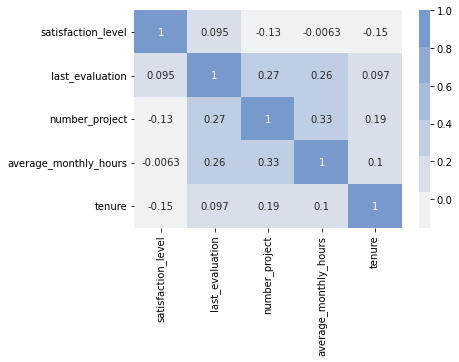

In [11]:
# Drop duplicates and save resulting dataframe in a new variable as needed

df0_new = df0.drop_duplicates()


# Display first few rows of new dataframe as needed



# Subset of dataframe with just categorical variables
df0_cat = df0_new[["work_accident","left_job","promotion_last_5years","department","salary"]]

df0_new.head()

df0_cat_pred = df0_cat.drop('left_job',axis=1)
# Names of the quantitative variables
quant_column = ~df0_new.columns.isin(df0_cat.columns)

# Subset of dataframe with just quantitative variables
df0_quant = df0_new.loc[:,quant_column]

quant_cor_matrix = df0_quant.corr()

sns.heatmap(quant_cor_matrix,annot=True,cmap=sns.light_palette("#79C"))

df0_cont = df0_quant[['satisfaction_level','last_evaluation','average_monthly_hours']]

df0_new.head()


#design matrix created for vif function
y_des, X_des = dmatrices('left_job ~ satisfaction_level + last_evaluation + number_project + average_monthly_hours +\
                         tenure',data = df0_new,return_type = 'dataframe')

#get a list of vif values
vif_factor_list = [vif(X_des.values,i) for i in range(len(X_des.columns))]

#create a dataframe with each predictor and its corresponding vif value
pred_vif_df = pd.DataFrame(zip(X_des.columns,vif_factor_list),columns = ['Predictor','VIF'])

pred_vif_df 



### Check outliers

Check for outliers in the data.

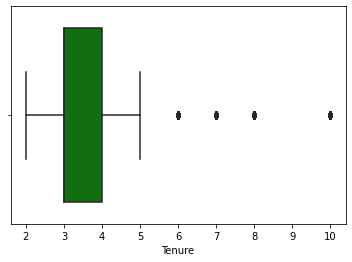

In [12]:
'''
Function: plot_title

Convert a snake case variable name into a label name for a plot where the underscore characters
are removed from the variable name and the first letter of each word is capitalized.

'''

def plot_title(var_name):
    new_name = var_name.replace("_"," ").title()
    return new_name


def boxplot_create_color(var_name = '', color = "",data = ''):
    sns.boxplot(x=var_name,color = color,data=data)
    plt.xlabel(plot_title(var_name))
    plt.show()
    

def boxplot_create_pal(var_name = '', palette = 'deep',data = ''):
    sns.boxplot(x=var_name,palette = palette,data=data)
    plt.xlabel(plot_title(var_name))
    plt.show()

boxplot_create_color(var_name = 'tenure' , color = "green",data=df0_new)
#The outliers are employees that stayed six years or longer (most employees have stayed around 3-4 years)



In [13]:
# Determine the number of rows containing outliers

def num_outliers(var,data):
    iqr = np.quantile(data[var],q=0.75) - np.quantile(data[var],q=0.25) # IQR = Q3 - Q1
    iqr_factor = 1.5 * iqr #factor used to determine outliers
    low_outlier = data[data[var] < np.quantile(data[var],q=0.25) - iqr_factor] # rows contain low outliers 1.5*IQR below Q1
    high_outlier = data[data[var] > np.quantile(data[var],q=0.75) + iqr_factor] # tows contain high outliers 1.5*IQR above Q3
    num_outlier = low_outlier.shape[0] + high_outlier.shape[0] # total up number of rows with low and high outliers
    return num_outlier

num_outliers(var = "tenure",data = df0_new) #there are 824 rows with outliers for the tenure variable

824

Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [14]:
# Get numbers of people who left vs. stayed

df0_new['left_job'].value_counts() # 10,000 stay and 1,991 left

# Get percentages of people who left vs. stayed

df0_new['left_job'].value_counts(normalize=True) # 83.4% of workers stayed and 16.6% of workers left


0    0.833959
1    0.166041
Name: left_job, dtype: float64

### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

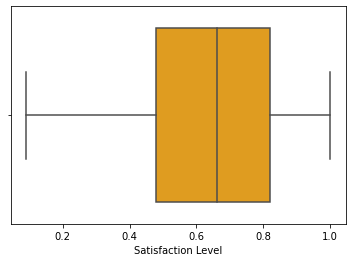

0

In [15]:
# Create a plot as needed

boxplot_create_color(var_name = 'satisfaction_level' , color = "orange",data=df0_new)


num_outliers(var = 'satisfaction_level',data = df0_new) #there are 0 rows with outliers for the satisfaction variable

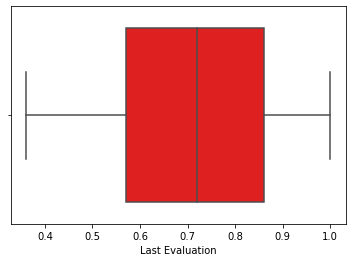

0

In [16]:
# Create a plot as needed

boxplot_create_color(var_name = 'last_evaluation' , color = "red",data=df0_new)

num_outliers(var = 'last_evaluation',data = df0_new) #there are 0 rows with outliers for the last_evaluation variable

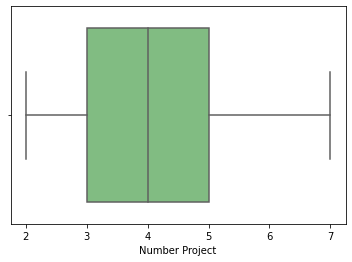

0

In [17]:
# Create a plot as needed



boxplot_create_pal(var_name = 'number_project', palette ='YlGn',data = df0_new)

num_outliers(var = 'number_project',data = df0_new) #there are 0 rows with outliers for the last_evaluation variable

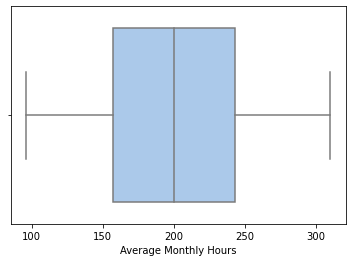

0

In [18]:
# Create a plot as needed


boxplot_create_pal(var_name = 'average_monthly_hours', palette = 'pastel',data = df0_new)


num_outliers(var = 'average_monthly_hours',data = df0_new) #there are 0 rows with outliers for the last_evaluation variable




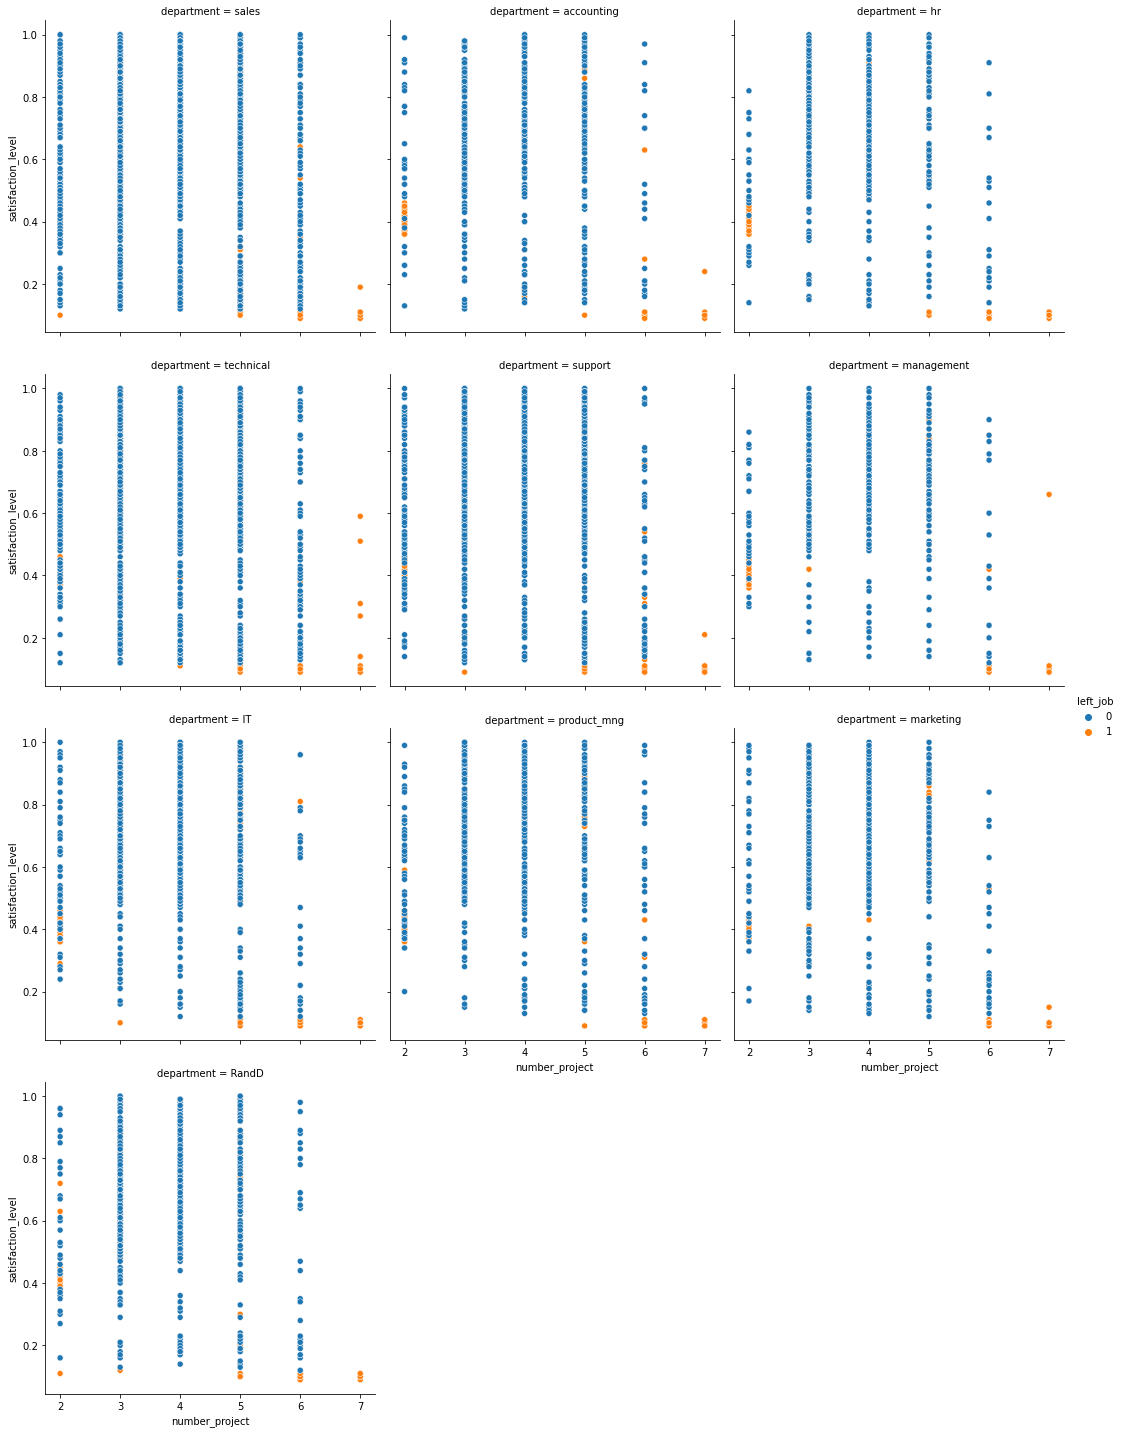

In [19]:


sns.relplot(data = df0_new,x="number_project",y="satisfaction_level",hue="left_job",col="department",col_wrap=3)

plt.show()



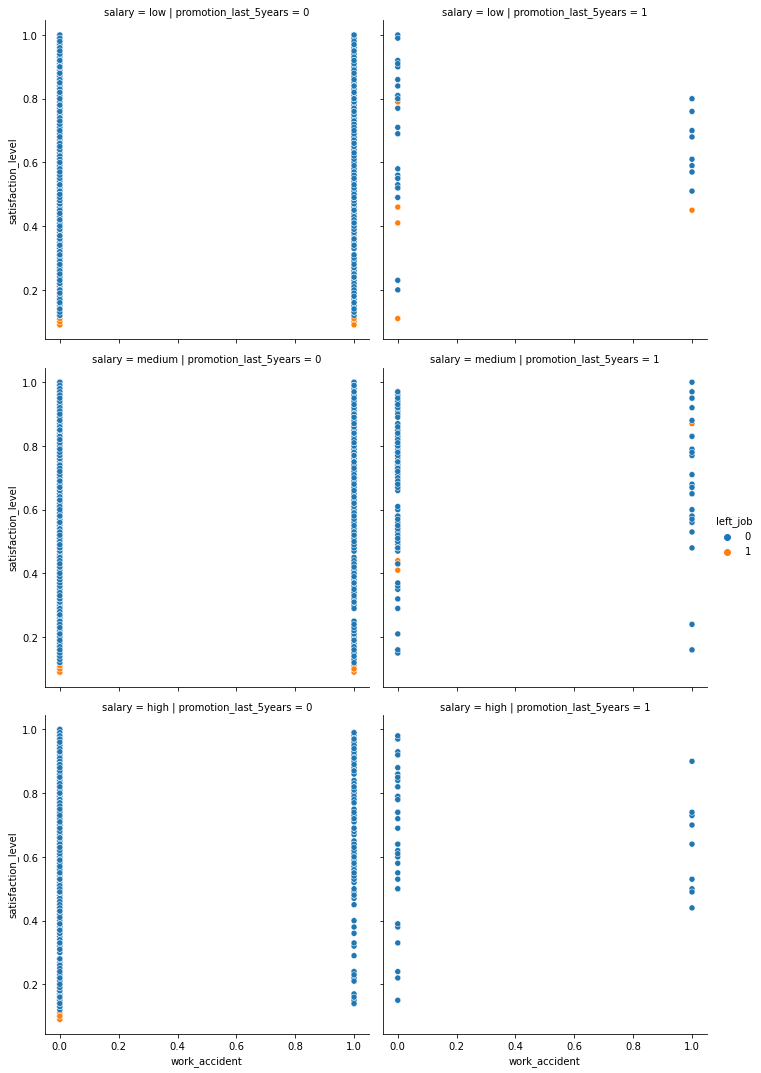

In [20]:

sns.relplot(data = df0_new,x="work_accident",y="satisfaction_level",hue="left_job",col="promotion_last_5years",row = "salary")

plt.show()


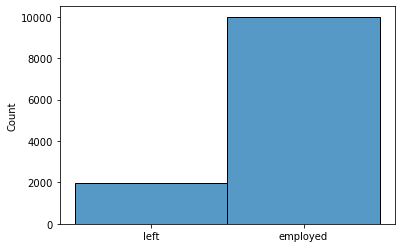

In [21]:


attrition = np.where(df0_new['left_job']==0,'employed','left')
sns.histplot(x = attrition)
plt.show()

#About 10,000 remain employed and 2,000 employees left




In [22]:
# Create a plot as needed
### YOUR CODE HERE ###



### Insights

[What insights can you gather from the plots you created to visualize the data? Double-click to enter your responses here.]

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

Predicting what factors affect a binary target variable (left_job which is 0 if the employee remains and 1 if the employee left the company.

### Identify the types of models most appropriate for this task.

[Double-click to enter your responses here.]

### Modeling

Add as many cells as you need to conduct the modeling process.

      salary  department  satisfaction_level  last_evaluation  number_project  \
0        1.0    0.190104                0.18             0.92             5.0   
1        0.0    0.185286                0.78             0.65             3.0   
2        0.0    0.115663                0.93             0.66             4.0   
3        0.0    0.171710                0.98             0.78             4.0   
4        1.0    0.178295                0.50             0.84             3.0   
...      ...         ...                 ...              ...             ...   
7189     1.0    0.185286                0.53             0.92             3.0   
7190     0.0    0.160000                0.70             0.84             2.0   
7191     1.0    0.178295                0.77             0.57             3.0   
7192     1.0    0.171710                0.50             0.49             4.0   
7193     2.0    0.171710                0.96             0.83             4.0   

      average_monthly_hours

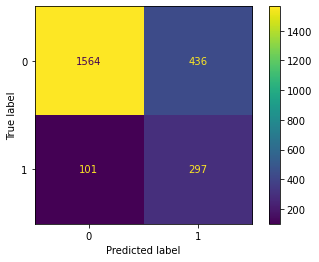

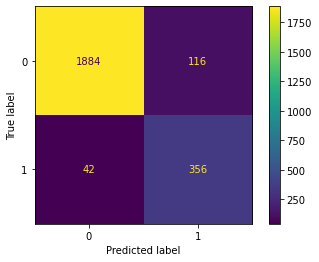

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2399 entries, 0 to 2398
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   salary                 2399 non-null   float64
 1   department             2399 non-null   float64
 2   satisfaction_level     2399 non-null   float64
 3   last_evaluation        2399 non-null   float64
 4   number_project         2399 non-null   float64
 5   average_monthly_hours  2399 non-null   float64
 6   tenure                 2399 non-null   float64
 7   work_accident          2399 non-null   float64
 8   promotion_last_5years  2399 non-null   float64
dtypes: float64(9)
memory usage: 168.8 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2399 entries, 0 to 2398
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   salary                 2399 non-null   category
 1   department

,salary,department,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years
0,1.0,0.178295,0.98,0.44,4.0,154.0,6.0,1.0,0.0
1,0.0,0.178295,0.40,0.49,2.0,135.0,3.0,0.0,0.0
2,0.0,0.178295,0.30,0.67,3.0,232.0,3.0,0.0,0.0
3,0.0,0.178295,0.96,0.52,4.0,228.0,3.0,0.0,0.0
4,0.0,0.178295,0.10,0.97,7.0,254.0,4.0,0.0,0.0


In [23]:

# New dataframe where categorical variables will be encoded
df_processed = df0_new.copy()


X = df_processed.drop('left_job',axis=1)

y = df_processed['left_job']

# Create an inital training set and test set (80% training and 20% test)

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.20, random_state=42,stratify= y)


# Create a new training set and validation set from the original training set (final setup 60% train, 20% val, 20% test)

X_tr, X_val, y_tr, y_val =  train_test_split(X_train, y_train, test_size=0.25, random_state=42,stratify= y_train)

pred_name = X_tr.columns

 
#Create a list of encoders encode salary with OrdinalEncoder and department with TargetEncoder

cat_transform = [('salary_t',OrdinalEncoder(categories=[['low','medium','high']]),['salary']),
                ('department_t',ce.TargetEncoder(),['department'])]

#salary which has levels: low, medium and high will be encoded as an ordinal variable

#Salary - Low:0, Medium:1 and High:2

#Transform the columns with the above encoders
column_transform = ColumnTransformer(transformers =cat_transform,remainder='passthrough')

#get the list of potential predictors
pred_name = X_tr.columns

#Retrieve all predictors except salary and department
pred_name = pred_name[:-2]

#Move salary and department to the head of the potential predictor name list

pred_name = ['salary','department',*pred_name] #add salary and department to the top of the list

#fit and transform the salary and department variables with the appropriate encoder

c_fit = column_transform.fit_transform(X_tr,y_tr)


c_fit_df = pd.DataFrame(c_fit,columns = pred_name)

##### Create a c_fit dataframe to use with SMOTE #######
c_fit_df_cat = c_fit_df.copy()

c_fit_df_cat["work_accident"] = c_fit_df_cat["work_accident"].astype("category")

c_fit_df_cat["promotion_last_5years"] = c_fit_df_cat["promotion_last_5years"].astype("category") 

c_fit_df_cat["department"] = c_fit_df_cat["department"].astype("category") 

c_fit_df_cat["salary"] = c_fit_df_cat["salary"].astype("category") 

###### End dataframe to use with SMOTE section ######

y_tr_df = pd.DataFrame(y_tr)

y_val_df = pd.DataFrame(y_val)

#transform the salary and department variables with the appropriate encoder in the validation set
val_trans = column_transform.transform(X_val)

val_trans_df = pd.DataFrame(val_trans,columns = pred_name)

##### Create a val_trans dataframe to use with SMOTE #######
val_trans_df_cat = val_trans_df.copy()

val_trans_df_cat["work_accident"] = val_trans_df_cat["work_accident"].astype("category")

val_trans_df_cat["promotion_last_5years"] = val_trans_df_cat["promotion_last_5years"].astype("category") 

val_trans_df_cat["department"] = val_trans_df_cat["department"].astype("category") 

val_trans_df_cat["salary"] =  val_trans_df_cat["salary"].astype("category") 

###### End dataframe to use with SMOTE section ######


#transform the salary and department variables with the appropriate encoder in the test set
test_trans = column_transform.transform(X_test)

test_trans_df = pd.DataFrame(test_trans,columns = pred_name)

##### Create a test_trans dataframe to use with SMOTE #######
test_trans_df_cat = test_trans_df.copy()

test_trans_df_cat["work_accident"] = test_trans_df_cat["work_accident"].astype("category")

test_trans_df_cat["promotion_last_5years"] = test_trans_df_cat["promotion_last_5years"].astype("category") 

test_trans_df_cat["department"] = test_trans_df_cat["department"].astype("category") 

test_trans_df_cat["salary"] =  test_trans_df_cat["salary"].astype("category") 

###### End dataframe to use with SMOTE section ######

print(c_fit_df)

#pipeline for logistic regression
logistic_pipe = imb_make_pipeline(SMOTENC(categorical_features = c_fit_df_cat.dtypes=='category',
                                          sampling_strategy='all',random_state=30,k_neighbors = 9),
                                  RobustScaler(), LogisticRegression(random_state=0,solver='liblinear',
                                                                     class_weight ='balanced'))
                                                               
#In the above pipeline, SMOTE uses k nearest neighbors fit with 9 clusters (k=9)


#Create a logisitc model with all possible predictors in the dataset (Model 1)
                            

log1_model = logistic_pipe.fit(c_fit_df_cat,y_tr)


#Apply logistic model 1 to the validation set
ypred_mod1 = log1_model.predict(val_trans_df_cat)

#Create a confusion matrix for model 1
c_mat_mod1 = metrics.confusion_matrix(y_val,ypred_mod1,labels = log1_model.classes_)

disp_mod1 = metrics.ConfusionMatrixDisplay(confusion_matrix = c_mat_mod1,display_labels = log1_model.classes_)

disp_mod1.plot(values_format="d")
plt.show()

#Create a logisitc model with all possible predictors in the dataset with Quadratic Effects (Model 2)


logistic_pipe = imb_make_pipeline(SMOTENC(categorical_features = c_fit_df_cat.dtypes=='category',
                                          sampling_strategy='all',random_state=30,k_neighbors = 9),
                                  RobustScaler(), PolynomialFeatures(degree=2),
                                  LogisticRegression(random_state=0,solver='liblinear',class_weight ='balanced'))
                                 

log2_model = logistic_pipe.fit(c_fit_df_cat,y_tr)


#Apply logistic model 1 to the validation set
ypred_mod2 = log2_model.predict(val_trans_df_cat)

#Create a confusion matrix for model 1
c_mat_mod2 = metrics.confusion_matrix(y_val,ypred_mod2,labels = log2_model.classes_)

disp_mod2 = metrics.ConfusionMatrixDisplay(confusion_matrix = c_mat_mod2,display_labels = log2_model.classes_)

disp_mod2.plot(values_format="d")
plt.show()

test_trans_df.info()
test_trans_df_cat.info()
test_trans_df_cat.head()
 

<Figure size 720x720 with 0 Axes>

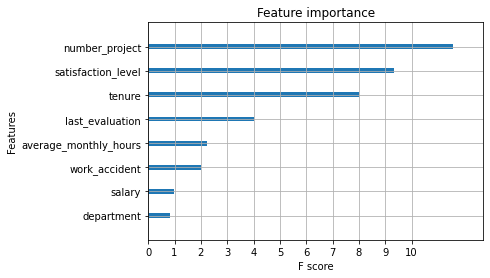

<Figure size 720x720 with 0 Axes>

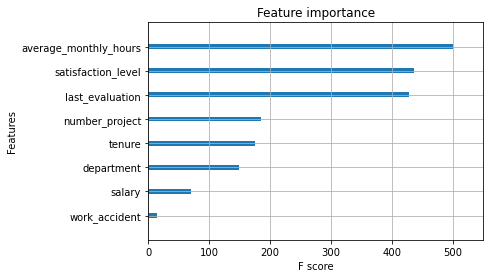

CPU times: user 8min 3s, sys: 468 ms, total: 8min 4s
Wall time: 4min 2s


In [24]:
%%time
xgb_clf = XGBClassifier(random_state=0,objective = 'binary:logistic',n_jobs = -1)

xgb_fit = xgb_clf.fit(c_fit_df,y_tr)

#xgb_fit = xgb_clf.fit(c_fit_df,y_tr_res)
#y_tr_res
# feature importance array
xgb_fit.feature_importances_

#plot importance of features in gradient boosting model (XGBoost)
plt.figure(figsize=(10, 10))
plot_importance(xgb_fit,importance_type = "gain",show_values=False)
plt.xticks(range(0,11))
plt.show()

plt.figure(figsize=(10, 10))
plot_importance(xgb_fit,show_values=False)
plt.show()



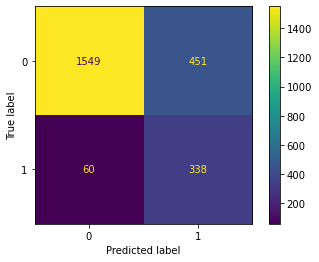

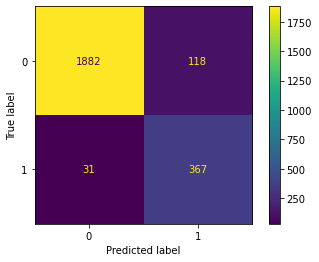

model 4 AUC
Model 4 AUC score is 0.9316.


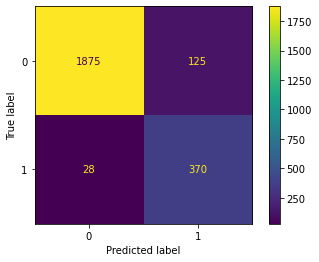

Model 1 AUC score is 0.7641.
Model 2 AUC score is 0.9182.
Model 3 AUC score is 0.8119.
Model 4 AUC score is 0.9316.
Model 5 AUC score is 0.7981.
Model 6 AUC score is 0.9336.
(2399, 2)
<class 'numpy.ndarray'>
[0.001 0.961 0.329 ... 0.006 0.    0.996]
[0 1 0 ... 0 0 1]
Selected Candidate Model AUC
0.936088488419107


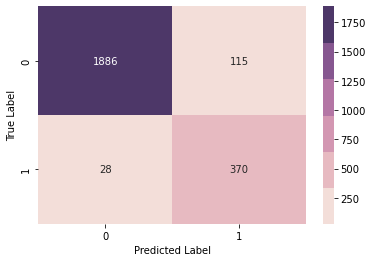

     coef                                     terms
0  -1.313                                         1
1  -0.037                     average_monthly_hours
2   0.714                           last_evaluation
3  -2.764                        satisfaction_level
4  -0.247                            number_project
5   2.660                                    tenure
6   0.189                   average_monthly_hours^2
7   1.848     average_monthly_hours last_evaluation
8  -0.135  average_monthly_hours satisfaction_level
9   1.313      average_monthly_hours number_project
10  1.080              average_monthly_hours tenure
11 -1.732                         last_evaluation^2
12  1.604        last_evaluation satisfaction_level
13  2.875            last_evaluation number_project
14  0.842                    last_evaluation tenure
15 -0.990                      satisfaction_level^2
16 -0.244         satisfaction_level number_project
17  2.012                 satisfaction_level tenure
18  1.598   

In [25]:
model_vars_6pred = ['average_monthly_hours','satisfaction_level','last_evaluation','number_project','tenure','work_accident']


#Create a logisitc model with six predictors in the dataset with Quadratic Effects (Model 3)


logistic_pipe = imb_make_pipeline(SMOTENC(categorical_features =(c_fit_df_cat[model_vars_6pred]).dtypes=='category',
                                          sampling_strategy='all',random_state=30,k_neighbors = 9),
                                  RobustScaler(),LogisticRegression(random_state=0,solver='liblinear',class_weight ='balanced'))
                                                               

log3_model = logistic_pipe.fit(c_fit_df[model_vars_6pred ],y_tr)


ypred_mod3 = log3_model.predict(val_trans_df[model_vars_6pred ])

ypred_mod_candidate = log3_model.predict(test_trans_df[model_vars_6pred ])

c_mat_mod3 = metrics.confusion_matrix(y_val,ypred_mod3,labels = log3_model.classes_)

disp_mod3 = metrics.ConfusionMatrixDisplay(confusion_matrix = c_mat_mod3,display_labels = log3_model.classes_)

disp_mod3.plot(values_format="d")
plt.show()


#Create a logisitc model with six predictors in the dataset with Quadratic Effects (Model 4)


logistic_pipe = imb_make_pipeline(SMOTENC(categorical_features =(c_fit_df_cat[model_vars_6pred]).dtypes=='category',
                                          sampling_strategy='all',random_state=30,k_neighbors = 9),
                                  RobustScaler(),PolynomialFeatures(degree=2),
                                  LogisticRegression(random_state=0,solver='liblinear',class_weight ='balanced'))
                                                               


log4_model = logistic_pipe.fit(c_fit_df[model_vars_6pred ],y_tr)

ypred_mod4 = log4_model.predict(val_trans_df[model_vars_6pred ])

ypred_mod_candidate = log4_model.predict(test_trans_df[model_vars_6pred ])

c_mat_mod4 = metrics.confusion_matrix(y_val,ypred_mod4,labels = log4_model.classes_)

disp_mod4 = metrics.ConfusionMatrixDisplay(confusion_matrix = c_mat_mod4,display_labels = log4_model.classes_)

disp_mod4.plot(values_format="d")
plt.show()


print('model 4 AUC')
print(f'Model 4 AUC score is {metrics.roc_auc_score(y_val, ypred_mod4):.4f}.' ) #80.3% AUC

#######################################################################


model_vars_5pred = ['average_monthly_hours','last_evaluation','satisfaction_level','number_project','tenure']


#Create a logisitc model with five predictors in the dataset (Model 5)
logistic_pipe = imb_make_pipeline(SMOTE(random_state=30,k_neighbors = 9),RobustScaler(),
                                  LogisticRegression(random_state=0,solver='liblinear',class_weight ='balanced'))
                             
    
log5_model = logistic_pipe.fit(c_fit_df[model_vars_5pred],y_tr)

ypred_mod5 = log5_model.predict(val_trans_df[model_vars_5pred])

c_mat_mod5 = metrics.confusion_matrix(y_val,ypred_mod5,labels = log5_model.classes_)

disp_mod5 = metrics.ConfusionMatrixDisplay(confusion_matrix = c_mat_mod5,display_labels = log5_model.classes_)

#Create a logisitc model with five predictors in the dataset with Quadratic Effects (Model 6)
logistic_pipe = imb_make_pipeline(SMOTE(random_state=30,k_neighbors = 9),RobustScaler(),PolynomialFeatures(degree=2),
                                  LogisticRegression(random_state=0,solver='liblinear',class_weight ='balanced'))
                             
    
log6_model = logistic_pipe.fit(c_fit_df[model_vars_5pred],y_tr)

ypred_mod6 = log6_model.predict(val_trans_df[model_vars_5pred])

c_mat_mod6 = metrics.confusion_matrix(y_val,ypred_mod6,labels = log6_model.classes_)

disp_mod6 = metrics.ConfusionMatrixDisplay(confusion_matrix = c_mat_mod6,display_labels = log6_model.classes_)

disp_mod6.plot(values_format="d")
plt.show()


print(f'Model 1 AUC score is {metrics.roc_auc_score(y_val, ypred_mod1):.4f}.') 

print(f'Model 2 AUC score is {metrics.roc_auc_score(y_val, ypred_mod2):.4f}.')

print(f'Model 3 AUC score is {metrics.roc_auc_score(y_val, ypred_mod3):.4f}.') 

print(f'Model 4 AUC score is {metrics.roc_auc_score(y_val, ypred_mod4):.4f}.')

print(f'Model 5 AUC score is {metrics.roc_auc_score(y_val, ypred_mod5):.4f}.') 

print(f'Model 6 AUC score is {metrics.roc_auc_score(y_val, ypred_mod6):.4f}.')


ypred_mod_candidate = log6_model.predict(test_trans_df[model_vars_5pred])


#predicted probabilities of both classes left_job = 0 and left_job = 1
cand_left_prob_both = log6_model.predict_proba(test_trans_df[model_vars_5pred]).round(3)

#predicted probabilities of an employee leaving
cand_left_prob = log6_model.predict_proba(test_trans_df[model_vars_5pred]).round(3)[:,1]

print(log6_model.predict_proba(test_trans_df[model_vars_5pred]).shape)

print(type(cand_left_prob))

print(cand_left_prob)
print(ypred_mod_candidate)
print('Selected Candidate Model AUC')
#Selected Candidate Model AUC

print(metrics.roc_auc_score(y_test, ypred_mod_candidate)) #93.6

#Confusion Matrix for Selected Candidate Model
c_mat_mod_cand = metrics.confusion_matrix(y_test,ypred_mod_candidate,labels = log6_model.classes_)

ax_cmat_cand = sns.heatmap(data = c_mat_mod_cand,annot=True,cmap = sns.cubehelix_palette(gamma=.7),fmt='.0f')

ax_cmat_cand.set(xlabel = "Predicted Label", ylabel = "True Label")

plt.show()

#log6_model.coef  #coefficients of the chosen candidate model

#terms in the quadratic logistic regression model (includes the intercept which is labeled as 1)
cand_log_terms = log6_model.named_steps['polynomialfeatures'].get_feature_names_out(input_features= model_vars_5pred)

# coefficients in the logistic regression model (does not include the intercept)
cand_log_coef = (log6_model.named_steps['logisticregression'].coef_).round(3)

# slope coefficients in the logistic regression model plus intercept
np.insert(cand_log_coef,0,log6_model.named_steps['logisticregression'].intercept_)

# convert the coefficient and intercept array to a list
cand_log_coef = cand_log_coef.flatten().tolist()

# zip the coefficient list and feature name lists
cand_log = list(zip(cand_log_coef,cand_log_terms))

#Creates a dataframe that has each term in the candidate model along with its corresponding coefficient

cand_log_df = pd.DataFrame(cand_log,columns=['coef','terms'])

print(cand_log_df)

#classification report
print(metrics.classification_report(y_test, ypred_mod_candidate))

#recall

print(f'Model Recall Score {metrics.recall_score(y_test, ypred_mod_candidate):.4f}.')

#precision
print(f'Model Precision Score {metrics.precision_score(y_test, ypred_mod_candidate):.4f}.')

#accuracy
print(f'Model Accuracy Score {metrics.accuracy_score(y_test, ypred_mod_candidate):.4f}.')

#f1 score
print(f'Model F1 Score {metrics.f1_score(y_test, ypred_mod_candidate):.4f}.')


'''
Extra Functions Below
'''

'''
function: quartile_range_values provides the Q1-Q3 quartile values for a feature along with the min and max value.
'''

quartile_range_vals = lambda data ,col: (pd.DataFrame(data=data)[col].describe()[3:]).astype(int).to_list()

'''
function: sd_min_max provides the standard deviation, minimum and maximum for a feature along with the min and max value.
'''

sd_min_max = lambda data, col: (pd.DataFrame(data=data)[col].describe()[[2,3,7]]).astype(int).to_list()


'''
Subsets a dataframe based on the quartile and minimum and maximum values of a column
'''
def df_subset_quart(df,column):
    
    col_quart = quartile_range_vals(data =df,col = column )
    df_subset = df[0:][df[column].isin(col_quart)]
    return df_subset




PyALE._ALE_generic:INFO: Discrete feature detected.
PyALE._ALE_generic:INFO: Continuous feature detected.
PyALE._ALE_generic:INFO: Discrete feature detected.
PyALE._ALE_generic:INFO: Continuous feature detected.
PyALE._ALE_generic:INFO: Continuous feature detected.


CPU times: user 12.2 s, sys: 5.69 s, total: 17.9 s
Wall time: 11.3 s


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x77ff172f89d0>,
        None]], dtype=object)

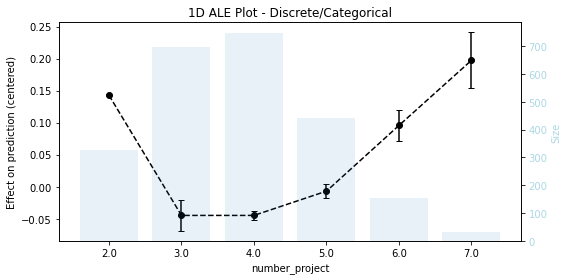

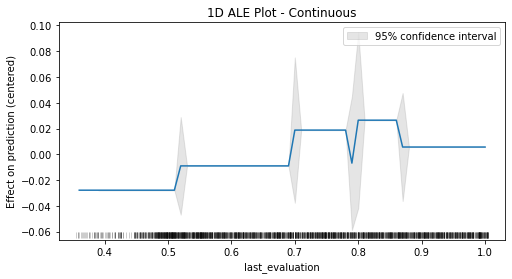

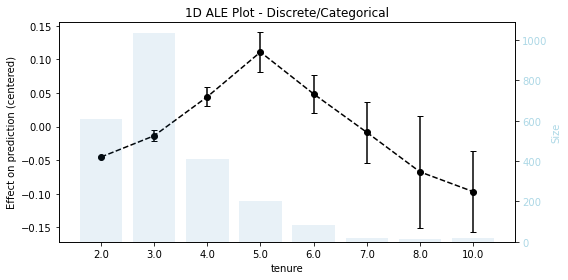

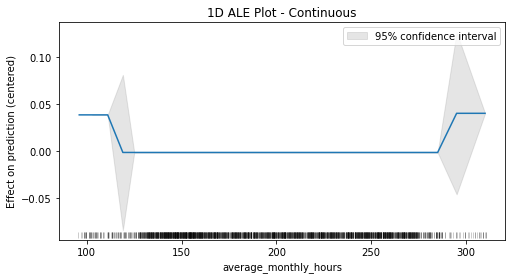

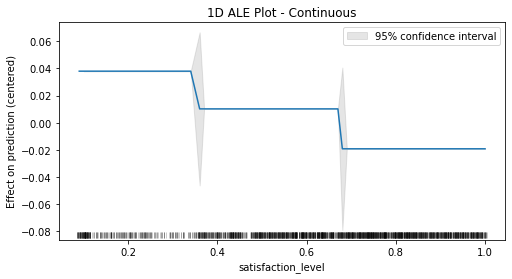

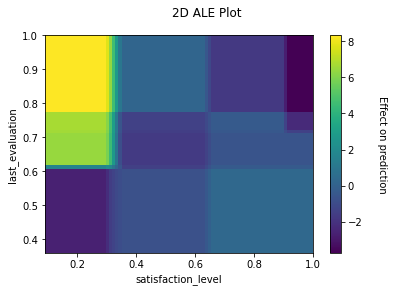

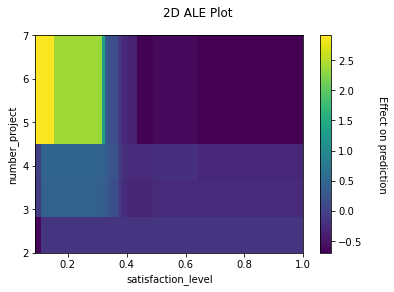

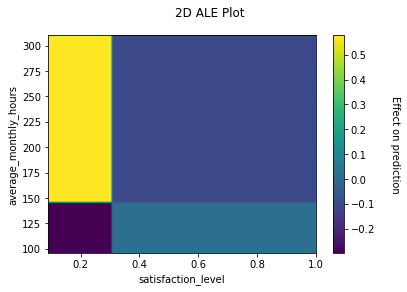

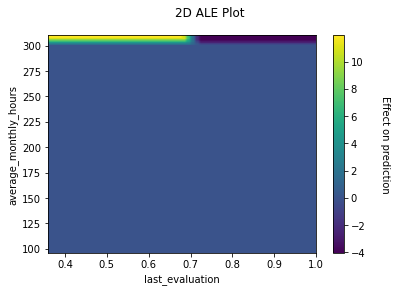

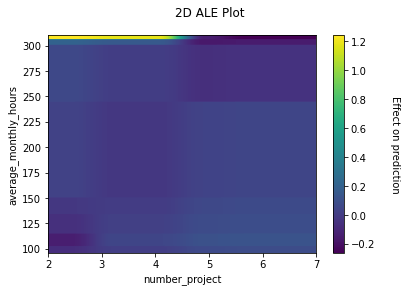

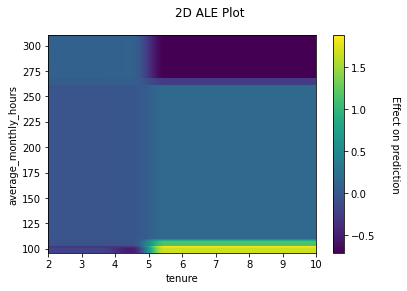

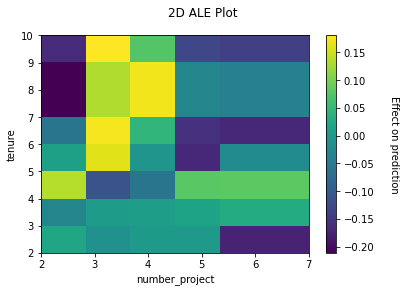

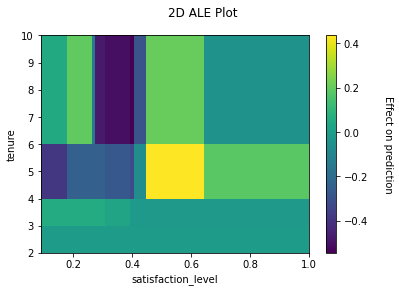

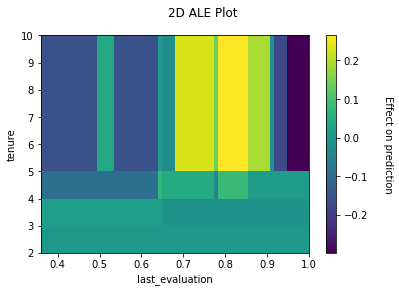

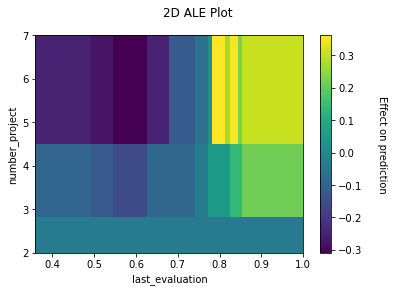

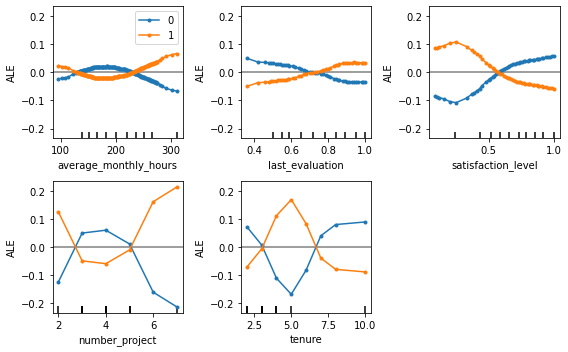

In [26]:
%%time

####################################

'''Main Effects
number_project
last_evaluation
tenure
average_monthly_hours
satisfaction_level
'''

# number_project 1D ALE plot
pe.ale(X =test_trans_df[model_vars_5pred],model=log6_model,feature=['number_project'], grid_size=100 )

# last_evaluation 1D ALE plot
pe.ale(X =test_trans_df[model_vars_5pred],model=log6_model,feature=['last_evaluation'], grid_size=100 )

# tenure 1D ALE plot
pe.ale(X =test_trans_df[model_vars_5pred],model=log6_model,feature=['tenure'], grid_size=100 )

# average_monthly_hours 1D ALE plot
pe.ale(X =test_trans_df[model_vars_5pred],model=log6_model,feature=['average_monthly_hours'], grid_size=100 )

# satisfaction_level 1D ALE plot
pe.ale(X =test_trans_df[model_vars_5pred],model=log6_model,feature=['satisfaction_level'], grid_size=100 )



'''
10 interaction pairs (with distinct features)
 
last_evaluation * satisfaction_level

number_project * satisfaction_level

average_monthly_hours * satisfaction_level

average_monthly_hours* last_evaluation

average_monthly_hours* num_project

average_monthly_hours * tenure

tenure * number_project

tenure * satisfaction_level

tenure * last_evaluation

number_project * last_evaluation 

'''

# last_evaluation * satisfaction_level 2D ALE plot

pe.ale(X =test_trans_df[model_vars_5pred],model=log6_model,feature=['last_evaluation','satisfaction_level'], grid_size=200 )

# number_project * satisfaction_level 2D ALE plot

pe.ale(X =test_trans_df[model_vars_5pred],model=log6_model,feature=['number_project','satisfaction_level'], grid_size=200 )

# average_monthly_hours * satisfaction_level 2D ALE plot

pe.ale(X =test_trans_df[model_vars_5pred],model=log6_model,feature=['average_monthly_hours','satisfaction_level'],grid_size=200 )


# average_monthly_hours* last_evaluation 2D ALE plot

pe.ale(X =test_trans_df[model_vars_5pred],model=log6_model,feature=['average_monthly_hours','last_evaluation'], grid_size=200 )


# average_monthly_hours* num_project 2D ALE plot

pe.ale(X =test_trans_df[model_vars_5pred],model=log6_model,feature=['average_monthly_hours','number_project'], grid_size=200 )


# average_monthly_hours* tenure 2D ALE plot

pe.ale(X =test_trans_df[model_vars_5pred],model=log6_model,feature=['average_monthly_hours','tenure'], grid_size=200 )

# tenure * number_project 2D ALE plot

pe.ale(X =test_trans_df[model_vars_5pred],model=log6_model,feature=['tenure','number_project'], grid_size=200 )


# tenure * satisfaction_level 2D ALE plot

pe.ale(X =test_trans_df[model_vars_5pred],model=log6_model,feature=['tenure','satisfaction_level'], grid_size=200 )

# tenure * last_evaluation 2D ALE plot

pe.ale(X =test_trans_df[model_vars_5pred],model=log6_model,feature=['tenure','last_evaluation'], grid_size=200 )


# number_project * last_evaluation 2D ALE plot

pe.ale(X =test_trans_df[model_vars_5pred],model=log6_model,feature=['number_project','last_evaluation'], grid_size=200 )

#############################


#### Main Effects ALE plots - Alibi Explain Section ############

prob_log_fun = log6_model.predict_proba

features_log_mod = log6_model.feature_names_in_

target_class = log6_model.classes_


prob_logistic_ale = ALE(prob_log_fun,features_log_mod,target_class)
        
prob_logistic_ex = prob_logistic_ale.explain(c_fit_df[model_vars_5pred].to_numpy())

# orange curves represent employees that leave (represented by 1) and blue for those that stay (represented by 0)
plot_ale(prob_logistic_ex,n_cols=3, fig_kw={'figwidth': 8, 'figheight': 5})


#### End of Main Effects ALE plots - Alibi Explain Section ############



100%|██████████| 2399/2399 [00:18<00:00, 131.79it/s]


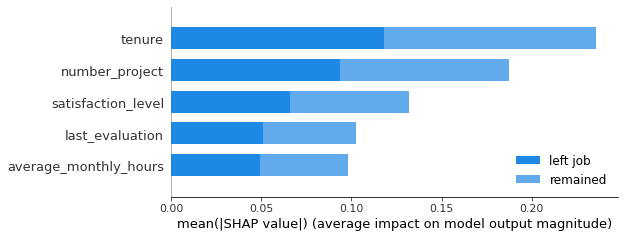

CPU times: user 37.8 s, sys: 14.8 s, total: 52.6 s
Wall time: 26.5 s


In [42]:
%%time


train_samp_index = np.random.choice(c_fit_df[model_vars_5pred].shape[0], 1000, replace=False)



sample_train = sp.kmeans(c_fit_df[model_vars_5pred],7)

shap_explain = sp.KernelExplainer(prob_log_fun,sample_train)
shap_values = shap_explain.shap_values(test_trans_df[model_vars_5pred])



sp.summary_plot(shap_values,c_fit_df[model_vars_5pred],c_fit_df[model_vars_5pred].columns,class_names = ['left job','remained'])



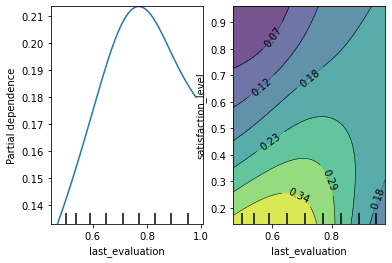

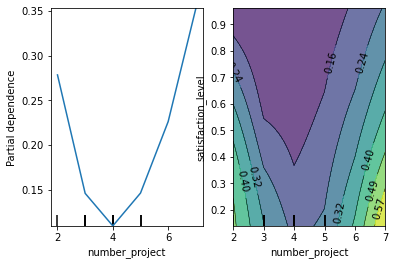

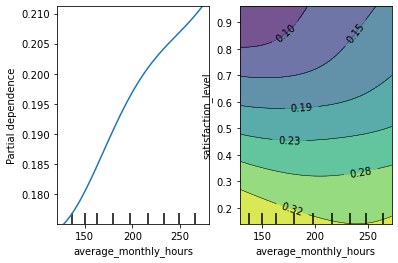

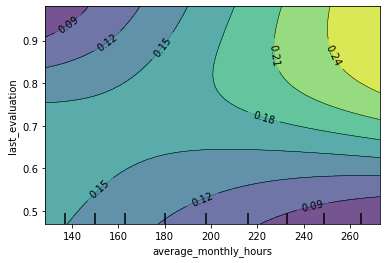

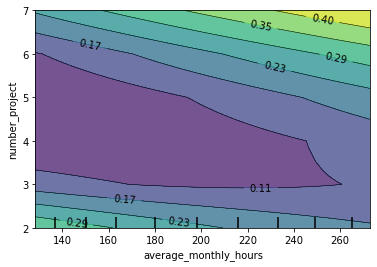

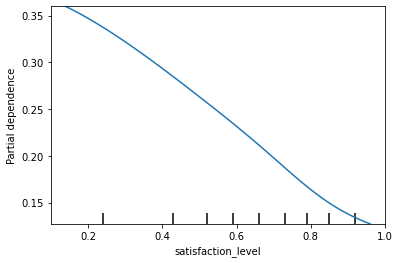

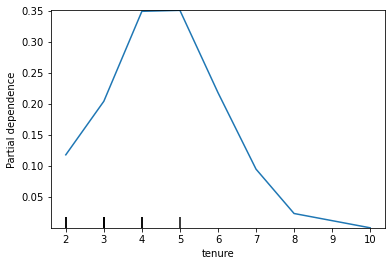

CPU times: user 2.21 s, sys: 1.17 s, total: 3.38 s
Wall time: 27.7 s


In [41]:
%%time

#last evaluation x satisfaction level
PartialDependenceDisplay.from_estimator(log6_model, test_trans_df[model_vars_5pred],
                                        ['last_evaluation',('last_evaluation','satisfaction_level')],
                                        n_jobs=-1,grid_resolution=50)


#number project x satisfaction level
PartialDependenceDisplay.from_estimator(log6_model,test_trans_df[model_vars_5pred],
                                        ['number_project',( 'number_project','satisfaction_level')],
                                        n_jobs=-1,grid_resolution=50)

#average_monthly hours x satisfaction level
PartialDependenceDisplay.from_estimator(log6_model, test_trans_df[model_vars_5pred], 
                                        ['average_monthly_hours',( 'average_monthly_hours','satisfaction_level')],
                                        n_jobs=-1,grid_resolution=50)

#average_monthly hours x last evaluation
PartialDependenceDisplay.from_estimator(log6_model, test_trans_df[model_vars_5pred], 
                                        [( 'average_monthly_hours','last_evaluation')],
                                        n_jobs=-1,grid_resolution=50)


#average_monthly hours x number_project
PartialDependenceDisplay.from_estimator(log6_model,test_trans_df[model_vars_5pred],
                                        [( 'average_monthly_hours','number_project')],
                                        n_jobs=-1,grid_resolution=50)

#1D Satisfaction Partial Dependence Plot
PartialDependenceDisplay.from_estimator(log6_model,test_trans_df[model_vars_5pred],
                                        ['satisfaction_level'],
                                        n_jobs=-1,grid_resolution=50)

#1D Tenure Partial Dependence Plot
PartialDependenceDisplay.from_estimator(log6_model,test_trans_df[model_vars_5pred],
                                        ['tenure'],
                                        n_jobs=-1,grid_resolution=50)


plt.show()

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Double-click to enter your responses here.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

[Double-click to enter your summary here.]

### Conclusion, Recommendations, Next Steps

[Double-click to enter your conclusion, recommendations, and next steps here.]

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.